# Exercise 1


(a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.
 (b) assuming now a Jeffreys’ prior,
$$
g(λ)∝1/ √λ,withλ>0
$$
compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

BONATO DIEGO - RLAB05
EXERCISE 1
Assuming UNIFORM PRIOR

    mean variance median cred_interval.low cred_interval.high
n1 0.615    0.003  0.613             0.511              0.728
n2 0.704    0.003  0.702             0.609              0.805

Assuming JEFFREY'S PRIOR
    mean variance median cred_interval.low cred_interval.high
n1 0.612    0.003  0.611             0.509              0.726
n2 0.702    0.003  0.701             0.607              0.803


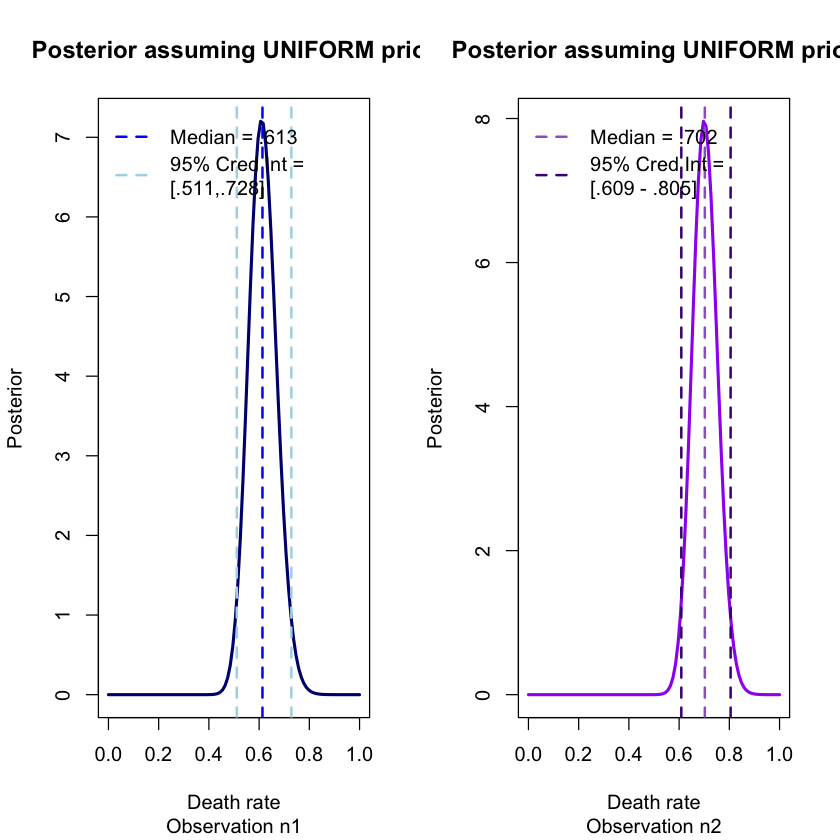

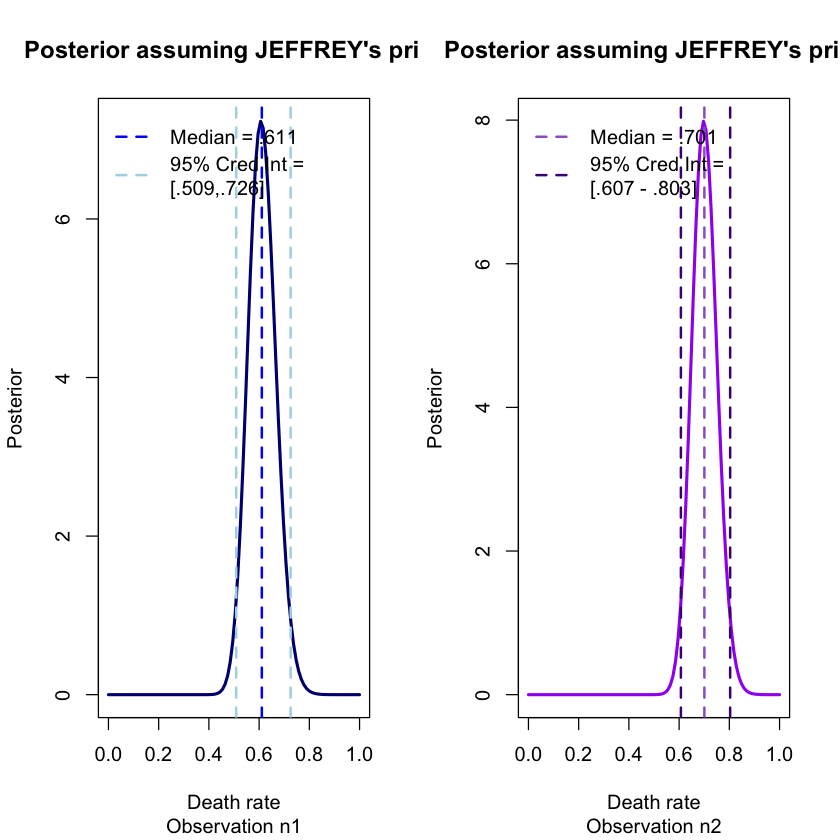

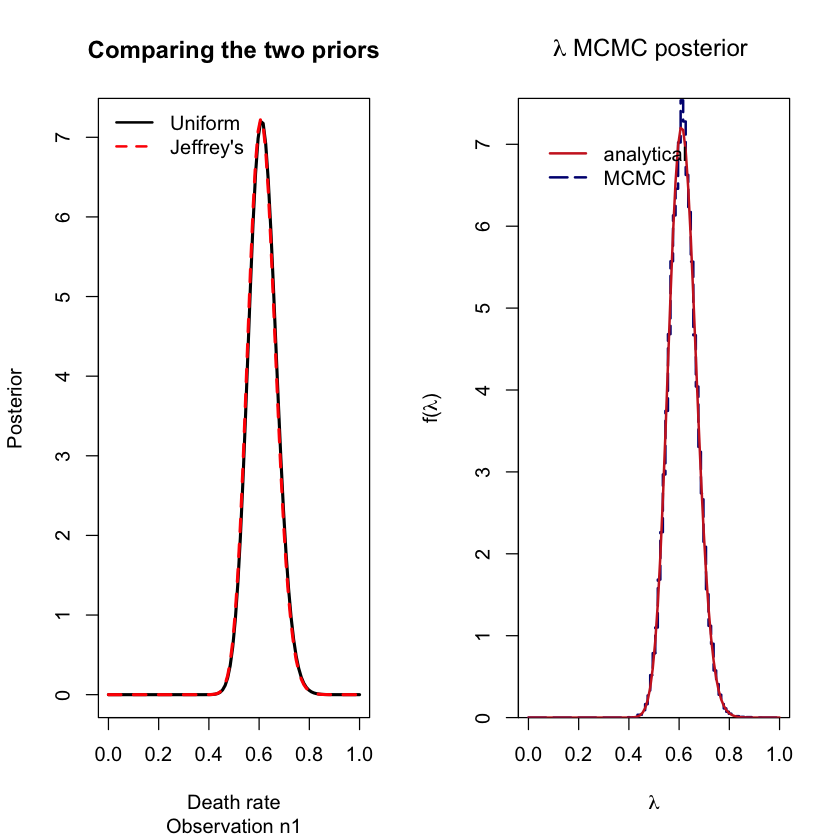

In [1]:
cat("BONATO DIEGO - RLAB05\n")
cat("================================\n")
cat("EXERCISE 1\n")

#n1,n2 are the two independent measurement
n1 = c(109,65, 22, 3, 1, 0)
n2 = c(144, 91, 32, 11, 2, 0 )

#treating the two observations independently


exercise_solver = function(observation_list, prior = "uniform"){
  y = seq(0, 5)
  tot_death = sum(observation_list * y)
  #n is the number of people in the sample dead+alive
  n = sum(observation_list)

  if (prior == "uniform") {
    # posterior parameter for gamma distribution
    alpha = 1 + tot_death
    lambda = n
  } else if (prior == "jeffrey") {
    alpha = 0.5 + tot_death
    lambda = n
  } else {
    cat("prior should be 'uniform' or 'jeffrey'")
    return(NULL)
  }

  # posterior quantities
  #
  #x-axis
  l = seq(from = 0, to = 1, length.out = 100)

  # Thanks to the properties of the gamma distribution, computing relevant values from the posterior is straightforward
  posterior = dgamma(l, alpha, lambda)
  mean = alpha / lambda
  variance = alpha / lambda**2
  median = qgamma(0.5, alpha, lambda)
  cred_interval = cbind(low = qgamma(2.5/100,alpha, lambda) ,  high = qgamma(97.5/100, alpha,lambda))

  results = data.frame(mean = mean, variance = variance, median = median,cred_interval =cred_interval)
  rownames(results) = deparse(substitute(observation_list))
  return(list(posterior = posterior,results = results))
}


## 1.A - assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

cat("Assuming UNIFORM PRIOR\n")
cat("\n")
post_unif_n1 = exercise_solver(n1, prior = "uniform")$posterior
post_unif_n2 = exercise_solver(n2, prior = "uniform")$posterior

#mean,median,variance, 95% cred int

summary_table = rbind(exercise_solver(n1, prior = "uniform")$results,exercise_solver(n2, prior = "uniform")$results)

print(round(summary_table,3))
#plot
l = seq(0,1,length.out=100)
par(mfrow=c(1,2))
plot(l,post_unif_n1,col="navy",type="l",lwd=2.5,main="Posterior assuming UNIFORM prior",sub="Observation n1",xlab = "Death rate",ylab="Posterior")

abline(v=summary_table$median[1],lty=2,lwd=2,col="blue")
abline(v=c(summary_table$cred_interval.low[1],summary_table$cred_interval.high[1]),lty=2,col="lightblue",lwd=2)
legend("topleft",legend=c("Median = .613","95% Cred Int = \n[.511,.728]"),col=c("blue","lightblue"),lty=c(2,2),lwd=c(2,2),bty="n")

plot(l,post_unif_n2,col="purple",type="l",lwd=2.5,main="Posterior assuming UNIFORM prior",sub="Observation n2",xlab = "Death rate",ylab="Posterior")

abline(v = summary_table$median[2], lty = 2, lwd = 2, col = "#9966CC")
abline(v = c(summary_table$cred_interval.low[2], summary_table$cred_interval.high[2]), lty = 2, col = "#4B0082", lwd = 2)
legend("topleft", legend = c("Median = .702", "95% Cred Int = \n[.609 - .805]"), col = c("#9966CC", "#4B0082"), lty = c(2, 2), lwd = c(2, 2),bty="n")

cat("\n")
cat("Assuming JEFFREY'S PRIOR\n")


post_jeff_n1 = exercise_solver(n1, prior = "jeffrey")$posterior
post_jeff_n2 = exercise_solver(n2, prior = "jeffrey")$posterior

#mean,median,variance, 95% cred int

summary_tablej = rbind(exercise_solver(n1, prior = "jeffrey")$results,exercise_solver(n2, prior = "jeffrey")$results)

print(round(summary_tablej,3))
#plot
l = seq(0,1,length.out=100)
par(mfrow=c(1,2))

plot(l,post_jeff_n1,col="navy",type="l",lwd=2.5,main="Posterior assuming JEFFREY's prior",sub="Observation n1",xlab = "Death rate",ylab="Posterior")

abline(v=summary_tablej$median[1],lty=2,lwd=2,col="blue")
abline(v=c(summary_tablej$cred_interval.low[1],summary_tablej$cred_interval.high[1]),lty=2,col="lightblue",lwd=2)
legend("topleft",legend=c("Median = .611","95% Cred Int = \n[.509,.726]"),col=c("blue","lightblue"),lty=c(2,2),lwd=c(2,2),bty="n")

plot(l,post_jeff_n2,col="purple",type="l",lwd=2.5,main="Posterior assuming JEFFREY's prior",sub="Observation n2",xlab = "Death rate",ylab="Posterior")

abline(v = summary_tablej$median[2], lty = 2, lwd = 2, col = "#9966CC")
abline(v = c(summary_tablej$cred_interval.low[2], summary_tablej$cred_interval.high[2]), lty = 2, col = "#4B0082", lwd = 2)
legend("topleft", legend = c("Median = .701", "95% Cred Int = \n[.607 - .803]"), col = c("#9966CC", "#4B0082"), lty = c(2, 2), lwd = c(2, 2),bty="n")


#comparing the two priors
plot(l,post_unif_n1,col="black",type="l",lwd=2.5,main="Comparing the two priors",sub="Observation n1",xlab = "Death rate",ylab="Posterior")

lines(l,post_jeff_n1,col="red",type="l",lty=2,lwd=2.5)

legend("topleft",legend = c("Uniform","Jeffrey's"),
col=c("black","red"),lty=c(1,2),lwd=c(2,2),bty="n")



metropolis.1dim = function(func,a,lambda,theta.init,n.sample,sigma){
		theta.cur = theta.init
		func.Cur  = func(theta.cur,a,lambda)
	
		func.Samp = matrix(data=NA,nrow=n.sample,ncol=2+1)
		n.accept = 0
		rate.accept = 0.0
		
		for ( n in 1:n.sample) {
			theta.prop = rnorm(n=1 , mean=theta.cur, sigma)
			func.Prop = func(theta.prop,a,lambda)
			
			logMR = func.Prop - func.Cur
			
			
			if ( logMR >= 0 || logMR > log10(runif(1)) ){
				theta.cur = theta.prop
				func.Cur = func.Prop
				n.accept = n.accept + 1
				}
			func.Samp[n,1] = func.Cur
			func.Samp[n,2] = theta.cur
			}
			return(func.Samp)
		} 


#we want to feed to the metropolis.1dim function the logarithm of the prior

post.metropolis = function(theta,a,lambda){
	return(log10(dgamma(theta,a,lambda)))
}


#parameters
theta.init = 0.6
sample.sig = 0.3
n.sample   = 10**5



n = c(109,65, 22, 3, 1, 0)
y = seq(0,5)
tot_death_y1 = sum(n * y)

#uniform posterior parameters
alpha = 1 + tot_death_y1
lambda = sum(n)



set.seed(420)

chain = metropolis.1dim(post.metropolis,a=alpha,lambda=lambda,theta.init,n.sample,sample.sig**2)

#plot

#par(mfrow=c(2,2),mgp=c(2,.8,0),mar=c(3.5,3.5,1,1),oma=0.1*c(1,1,1,1))

x = seq(0,1,length.out=100)
y = dgamma(x, alpha, lambda)



plot(x, y, type="n", yaxs="i", ylim=c(0, 1.05*max(y)), 
     main=expression(paste(lambda, " MCMC posterior", sep=' ')),
     xlab= expression(lambda), ylab= expression(paste('f(',lambda,')', sep='')))

#plot histogram of the chain and the analytical posterior
sa <- which(chain[,2]>= min(x) & chain[,2]<= max(x))
hist <- hist(chain[sa,2], breaks=seq(from=min(x), to=max(x), length=100), plot=FALSE)

Zhist <- sum(hist$counts )* diff(range(hist$breaks ))/(length(hist$counts ))
lines(hist$breaks , c(hist$counts *1/Zhist ,0),
    col='navy', type="s", lwd=2, lty=5)
lines(x, y, col='firebrick 3', lwd=2, lty=1)

leg.labels = c('analytical', 'MCMC')
leg.ltype = c(1, 5)
leg.colors = c('firebrick 3','navy')
legend ("topleft", inset =.05, bty='n', legend = leg.labels, lty=leg.ltype , col=leg.colors, lwd = 2)




# Exercise 3
A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. n = 116 samples were taken from streams having a high environmental impact on pandas. Out of these, y = 11 had a high bacter X level. Indicating with p the probability that a sample of water taken from the stream has a high bacter X level, 

*  find the frequentist estimator for p
*  using a Beta(1,10) prior for p, calculate and posterior distribution P(p | y)
*  find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval
*  test the hypotesis:

$$
H_0 : p = 0.1
$$
$$
H_1: p \neq 0.1
$$

In [2]:
cat("EXERCISE 3\n")


ex3_solver = function(y,n,a.prior,b.prior){
	cat("<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>\n")
	cat(paste("ANALYSIS WITH y=",y," n=",n," a.prior= ",a.prior," b.prior= ",b.prior,"\n"))
	
		# Find the frequentist estimator for p 
   
    #In the frequentist approach, the best estimator is the ratio ( assuming a high number of samples)
    p.frequentist = y/n
    cat("Best FREQUENTIST estimator: p  = ",
    round(p.frequentist,3),"\n")

   
    ## Assuming binomial likelihood (sample has or has not a high level of bacter), the posterior is the conjugate beta
    #beta prior parameters
    a  = a.prior
    b  = b.prior
    #x axis
    p = seq(0,1,length.out = 100)
    post = dbeta(p,a+y,b+n-y)

    ## Find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval 

    a_post = a + y 
    b_post = b + n - y 
    

    #bayesian estimator: Maximum Likelihood
    p.bayes = (a_post - 1) / ( a_post + b_post -2)

    var =  (a_post*b_post)/
    (((a_post+b_post)**2)*(a_post+b_post+1))

    mean = a_post/ (a_post + b_post)

    #95 cred int

    low_cred  = qbeta(2.5/100,a_post,b_post)
    high_cred = qbeta(97.5/100,a_post,b_post)

    #summary table

    summary = data.frame(MLE = round(p.bayes,4),
                          mean = round(mean,4),
                          var = round(var,4),
                          Cred.Int. =
                          paste(round(low_cred,4),"-",
                          round(high_cred,4)))

                              
    main.title = paste("Posterior w/ Beta(",a.prior,",",b.prior,")  prior // y = ",y," n = ",n)
    plot(p[1:30],post[1:30],type="l",lwd="2",col="purple",main=main.title,xlab="p",ylab="Posterior")
    abline(v=p.bayes,lty=2,col="blue",lwd=1.5)
                              
    abline(v=c(low_cred,high_cred),lty=2,col="orange",lwd=1.5)
    
    text(x = p.bayes,y = 5,labels = paste(round(p.bayes,3)),pos = 2,srt=90,col="blue")
	
	text(x=low_cred,y=5,labels=paste(round(low_cred,3)),srt=90,col="orange",pos=2)
	text(x=high_cred,y=4,labels=paste(round(high_cred,3)),srt=90,col="orange",pos=4)
	
	legend("topright", 
	legend = c("Posterior", "MLE","95% Credible Interval"),
	col = c("purple", "blue", "orange"), lwd = c(2, 1.5, 1.5),
	lty = c(1, 2, 2), bty = "n")
               
    cat("=============================================\n")
    
    
    
    ## test the hypothesis:
    #H0 :p=0.1 versus H1 : p !=0.1
    # at 5% level of significance with both the frequentist and bayesian approach 

    #bayesian approaposch
    #Let's see if p=.1 lies in the 95% credibility intervals computed before
    cat ( "95% credibility interval:",summary$Cred.Int.,"\n")
    cat("p=0.1 lies in the credibility interval. So we can say that there is a 95% probability that stream water is contamined with 10% of bacteriaX\n")
    cat("NULL Hypothesis is NOT REJECTED\n")

    #Frequentist approach
    #Compute p-value 

    #What's the probability of obtaining y = 11 on n = 116 observations assuming a probability equal to p = 10% ?
    
  
    p  = .1
   
    p0 = dbinom(y,n,p)

    alpha = .05
   



    #plot
    y_ax=0:25
    p=0.1
    n=116
    post.bin=dbinom(y_ax,n,p)

    #95% cl and alpha
    low.bin =  qbinom(0.025, n, 0.1)
    up.bin = qbinom(0.975,n,0.1)
    z=low.bin:up.bin
    pbin95=dbinom(z,n,p)
    pbin95=sum(pbin95)
    alpa=1-pbin95

    cols =c(rep("darkred",times=7), rep("darkgreen",times=4),"blue",
    rep("darkgreen",times=5),rep("darkred",times=9))
    barplot(post.bin,names=y_ax,
           col=cols,
           main="NULL distribution",
           ylab= "Density",
           xlab="y")
    abline(h=alpa,col=c("black"), lty=c(4), lwd=c(2))
    text(x=3,y=0.045,labels=paste("alpha= 5%"), col ='black', font=1)



    legend("topright", 
        legend = c("Reject", "Accept", "Our Sample"),
           fill = c("darkred", "darkgreen", "blue"),
           bty = "n")

           
	return(list(post = post,summary = summary))           

}


EXERCISE 3


<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>
ANALYSIS WITH y= 6  n= 116  a.prior=  1  b.prior=  10 
Best FREQUENTIST estimator: p  =  0.052 
95% credibility interval: 1 
p=0.1 lies in the credibility interval. So we can say that there is a 95% probability that stream water is contamined with 10% of bacteriaX
NULL Hypothesis is NOT REJECTED


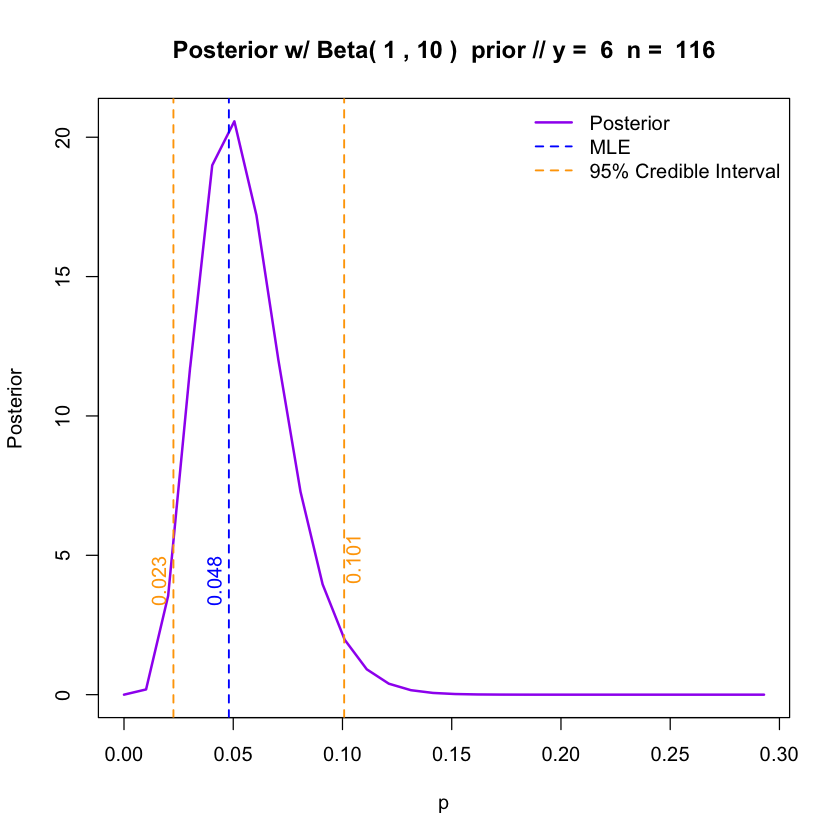

Summary table
    MLE   mean   var       Cred.Int.
1 0.048 0.0551 4e-04 0.0226 - 0.1008


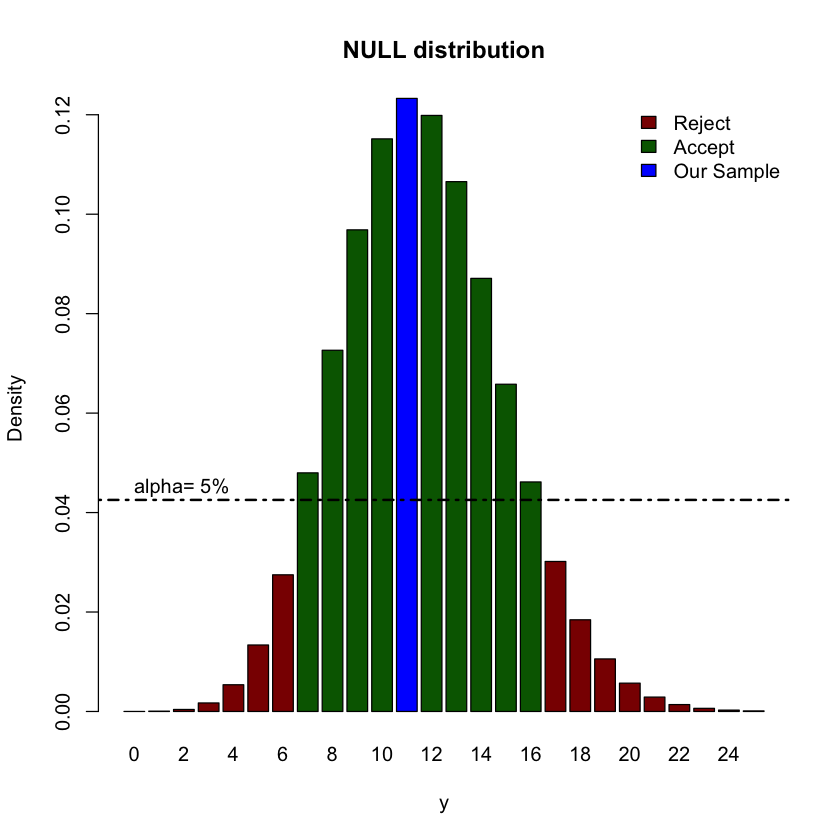

In [3]:

#using a Beta(1,10) prior for p, calculate and posterior distribution P(p | y)

results = ex3_solver(y=6,n=116,a=1,b=10)

post = results$post
summary = results$summary

cat("Summary table\n")
print(summary)


<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>
ANALYSIS WITH y= 9  n= 165  a.prior=  1  b.prior=  10 
Best FREQUENTIST estimator: p  =  0.055 
95% credibility interval: 1 
p=0.1 lies in the credibility interval. So we can say that there is a 95% probability that stream water is contamined with 10% of bacteriaX
NULL Hypothesis is NOT REJECTED


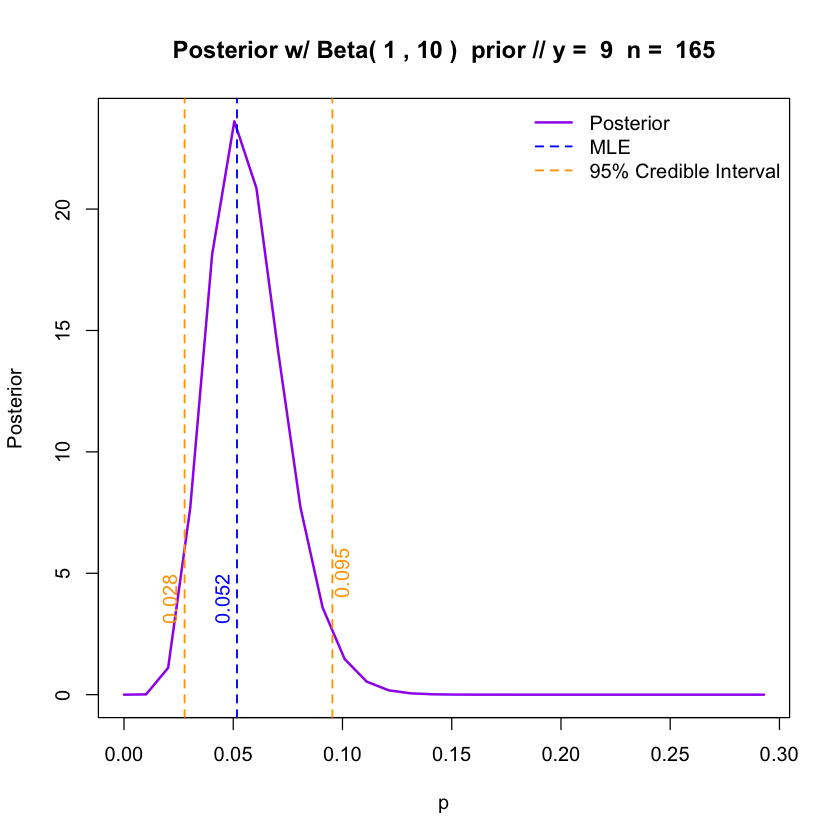

Summary table
     MLE   mean   var       Cred.Int.
1 0.0517 0.0568 3e-04 0.0277 - 0.0954
<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>
ANALYSIS WITH y= 9  n= 165  a.prior=  12  b.prior=  115 
Best FREQUENTIST estimator: p  =  0.055 


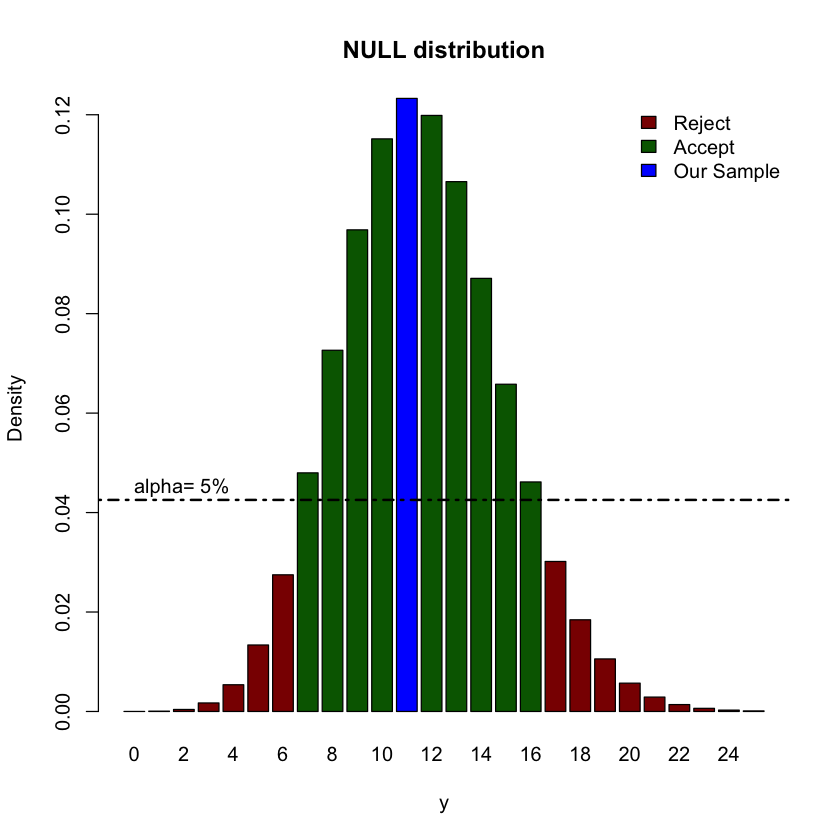

95% credibility interval: 1 
p=0.1 lies in the credibility interval. So we can say that there is a 95% probability that stream water is contamined with 10% of bacteriaX
NULL Hypothesis is NOT REJECTED


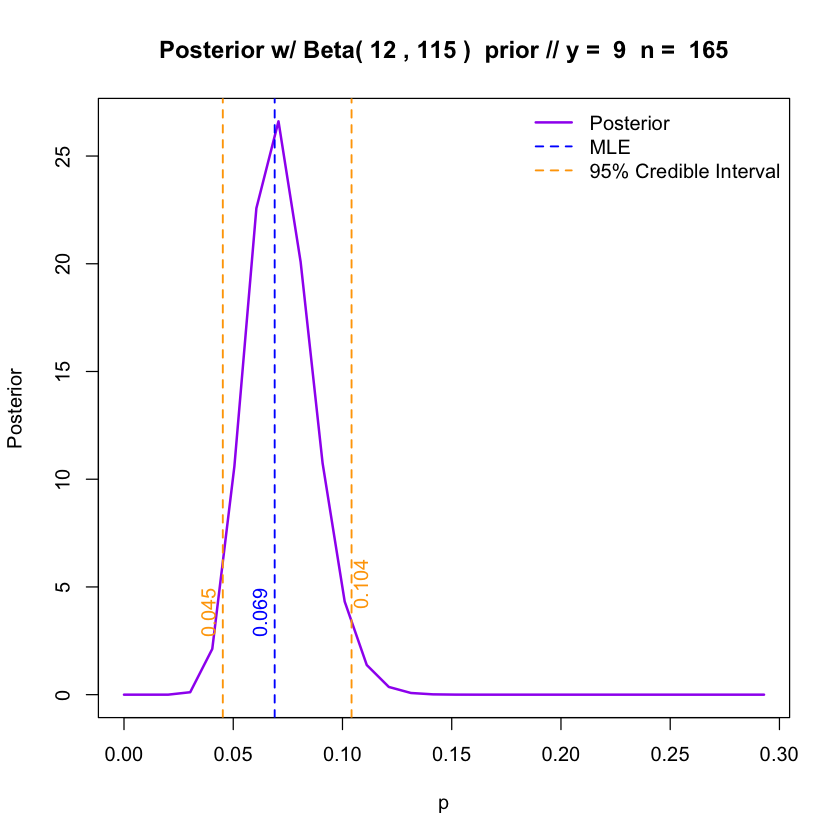

Summary table
     MLE   mean   var       Cred.Int.
1 0.0517 0.0568 3e-04 0.0277 - 0.0954
As expected, different priors lead to the same result.
 What matters in the end is data.

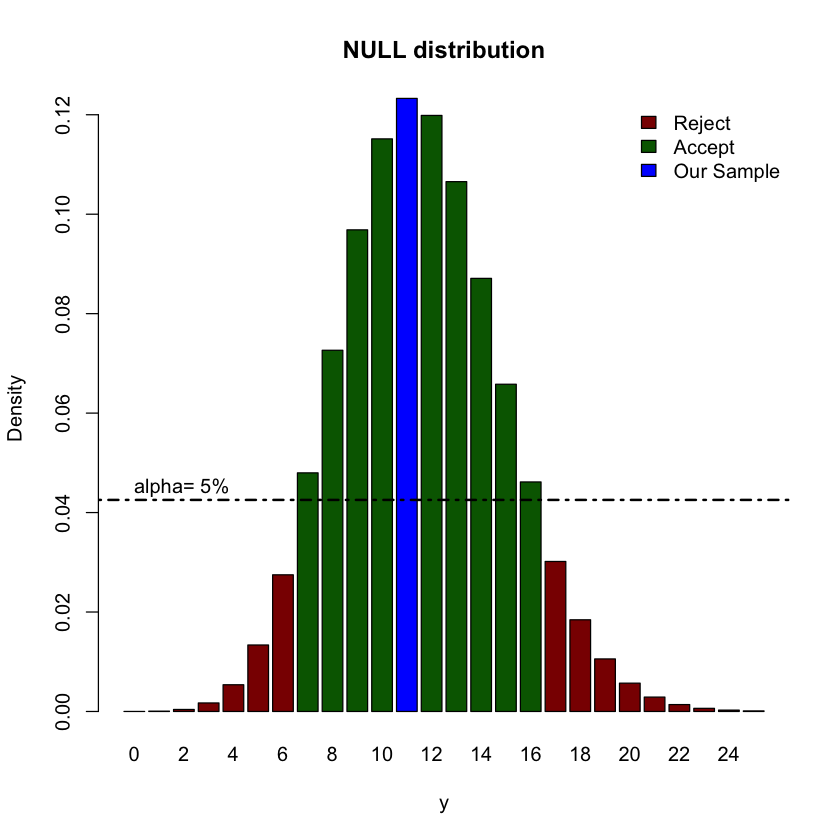

In [4]:


##########

#A new measurement, performed one month later on n = 165 water samples, gives y = 9 high bacter X level

n = 165
y = 9

#assuming beta prior (1,10)
results2 = ex3_solver(y=9,n=165,a=1,b=10)

post2 = results2$post
summary2 = results2$summary

cat("Summary table\n")
print(summary2)


#now assuming the posterior probability of the older measurement as the prior for the new one. 
#y.old = 11 n.old =116
a.old = 1 + 11 
b.old = 10 + 116 - 11

#where I'm using the fact that beta is the conjugate prior

results3 = ex3_solver(y=9,n=165,a=a.old,b=b.old)

post3 = results2$post

#Find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval 


summary3 = results2$summary

cat("Summary table\n")
print(summary3)

cat("As expected, different priors lead to the same result.\n What matters in the end is data.")


In [ ]:
cat("===================================\n")
cat("EXERCISE 4\n")
cat("===================================\n")
library(rjags)

#Preparing data with y = 11 n = 116
y = 11
n = 116
data_obs= c(rep(1,y),rep(0,n-y))

data   = NULL
data$X = data_obs
data$n = n

model = "model2.bug"

jm = jags.model(model,data)

#Burn-in
update(jm,1000)
chain = coda.samples(jm,c("p","y"),n.iter=10000)
print(summary(chain))

#Control plots
plot(chain, col="navy") 
# Let"s format our chain 
chain.df = as.data.frame(as.mcmc(chain))
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain.df)) 
hist(chain.df$p, breaks = 50, prob = TRUE, col = "darkolivegreen2", xlab = "p", ylab = "f(p)", main = "Inference on p")

# next data prediction probability
ty = table(chain.df$y)
barplot(ty/sum(ty),col="firebrick2", xlab="y", ylab="f(y)", ylim=c(0,0.40),main=sprintf("Number of successes in %d future trials", data$n_next)) 
# 
# Correlation between p and predicted variable 
#
plot(chain.df$p, chain.df$y, xlab="p", ylab="y", main="", pch="+", col="navy", cex=1.5, xlim=c(0,1), ylim=c(0,10))